# **Bagian 1: Import Library**

In [1]:
# Mengimpor library yang diperlukan untuk manipulasi data, analisis, dan pemodelan.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Untuk mengubah teks menjadi fitur numerik
from sklearn.metrics.pairwise import cosine_similarity       # Untuk menghitung kesamaan antar item
from wordcloud import WordCloud                              # Untuk visualisasi kata-kata paling sering muncul


In [2]:
# Mengatur tampilan plot agar lebih baik
plt.style.use('ggplot')

#**Bagian 2: Data Understanding (Pemahaman Data)**

## **Gathering Data**

In [ ]:
'''Langkah pertama adalah memuat data dan memahami struktur serta isinya. Kita akan memeriksa lima baris pertama, informasi kolom, nilai yang hilang, data duplikat, dan nilai unik untuk mendapatkan gambaran awal tentang dataset.'''
# 2.1 Gathering Data (Mengumpulkan Data)
df = pd.read_csv('/dataset/cleaned_movie_df.csv') # Contoh nama file dataset yang umum

In [4]:
# Melihat preview data (5 baris pertama)
print("\n--- Preview Data (df.head()) ---")
print(df.head())
print("\nUkuran DataFrame:", df.shape)


--- Preview Data (df.head()) ---
   Unnamed: 0 show_id     type                  title  release_year  \
0           0      s1    Movie   Dick Johnson Is Dead          2020   
1           1      s2  TV Show          Blood & Water          2021   
2           2      s3  TV Show              Ganglands          2021   
3           3      s4  TV Show  Jailbirds New Orleans          2021   
4           4      s5  TV Show           Kota Factory          2021   

                                           listed_in  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...  

Ukuran DataFrame: (22998, 6)


## **Assessing Data (Menilai Data)**

In [5]:
# 2.2.1 Checking Missing Values (Mengecek Nilai Kosong/Null)
print("\n--- Jumlah Nilai Kosong (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Jumlah Nilai Kosong (df.isnull().sum()) ---
Unnamed: 0      0
show_id         0
type            0
title           0
release_year    0
listed_in       0
dtype: int64


In [6]:
# 2.2.2 Checking Duplicate Data (Mengecek Data Duplikat)
# Menghitung jumlah baris duplikat di seluruh DataFrame.
print("\n--- Jumlah Data Duplikat (df.duplicated().sum()) ---")
print(df.duplicated().sum())
'''Jika ada duplikat, kita mungkin perlu menghapusnya untuk memastikan keunikan data.'''


--- Jumlah Data Duplikat (df.duplicated().sum()) ---
0


'Jika ada duplikat, kita mungkin perlu menghapusnya untuk memastikan keunikan data.'

## **Exploratory Data Analysis (EDA) - Analisis Data Eksplorasi**

### **Unique Values (Nilai Unik)**

In [7]:
# Mengecek jumlah nilai unik untuk kolom-kolom penting.
print("\n--- Jumlah Nilai Unik ---")
print(f"Jumlah Tipe Konten Unik (type): {df['type'].nunique()}")
print(f"Jumlah Judul Unik (title): {df['title'].nunique()}")
print(f"Jumlah Genre/Kategori Unik (listed_in): {df['listed_in'].nunique()}") # Perhatikan bahwa ini adalah string kombinasi genre


--- Jumlah Nilai Unik ---
Jumlah Tipe Konten Unik (type): 2
Jumlah Judul Unik (title): 22115
Jumlah Genre/Kategori Unik (listed_in): 1687


In [8]:
# Mengecek nilai unik untuk 'type'
print("\nDistribusi 'type':")
print(df['type'].value_counts())


Distribusi 'type':
type
Movie      16481
TV Show     6517
Name: count, dtype: int64


In [9]:
# Mengecek nilai unique untuk 'listed_in' (genre/kategori)
'''Pertama, pisahkan string genre menjadi daftar genre individual'''
genres_split = df['listed_in'].str.split(', ', expand=True)
all_genres = genres_split.stack().unique()
print(f"\nJumlah Genre/Kategori Individual Unik (setelah pemisahan): {len(all_genres)}")
print("\nContoh Genre/Kategori Individual Unik:")
print(all_genres[:10]) # Menampilkan 10 contoh pertama


Jumlah Genre/Kategori Individual Unik (setelah pemisahan): 120

Contoh Genre/Kategori Individual Unik:
['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies']


In [10]:
# Menghitung frekuensi setiap genre individual
genre_counts = genres_split.stack().value_counts()
print("\n--- 10 Genre/Kategori Paling Sering Muncul ---")
print(genre_counts.head(10))


--- 10 Genre/Kategori Paling Sering Muncul ---
Drama                     4728
Comedy                    3292
International Movies      2752
Dramas                    2427
Action                    2212
Comedies                  1674
Suspense                  1501
Documentaries             1393
Kids                      1388
International TV Shows    1351
Name: count, dtype: int64


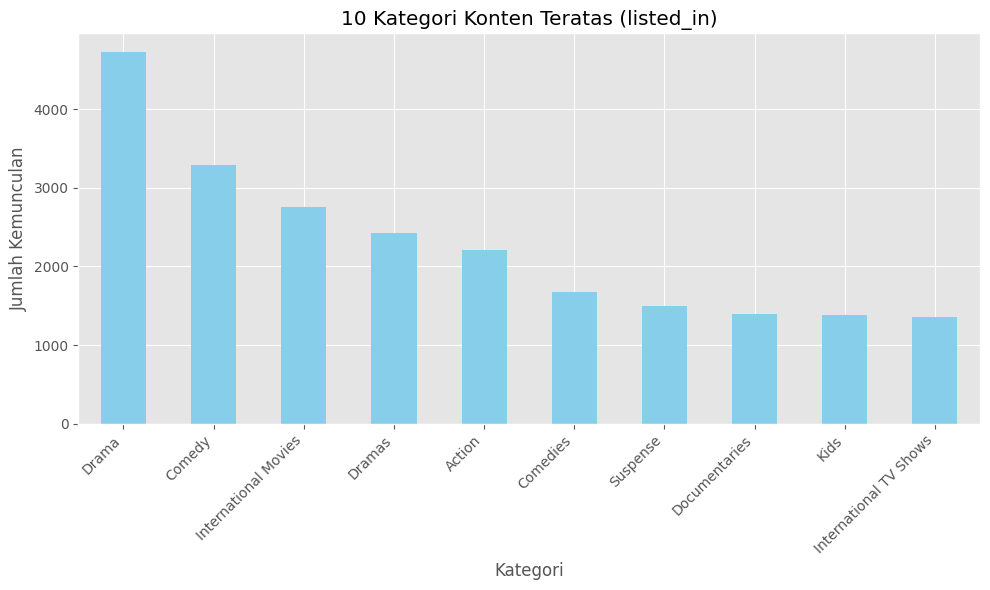

In [11]:
# Visualisasi 10 genre/kategori teratas
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('10 Kategori Konten Teratas (listed_in)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Wordcloud**

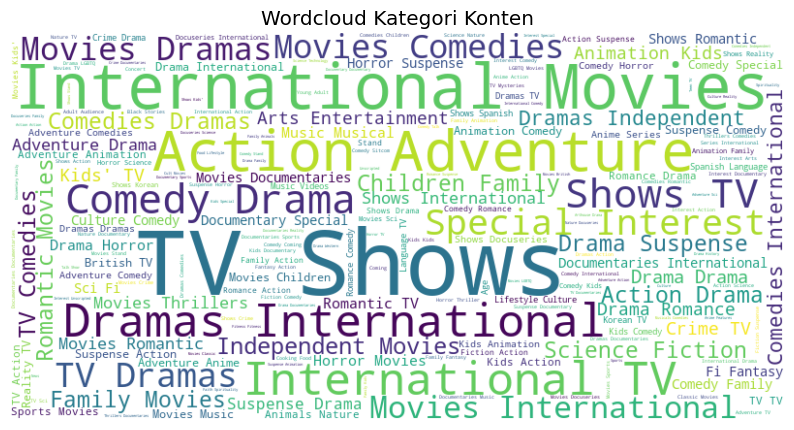

In [12]:
# Fungsi untuk membuat wordcloud
def create_wordcloud(data, title):
    if data.empty:
        print(f"Tidak ada data untuk membuat wordcloud '{title}'.")
        return
    text = ' '.join(data.dropna().astype(str)) # Gabungkan semua teks, hilangkan NaN
    if not text:
        print(f"Teks kosong untuk membuat wordcloud '{title}'.")
        return
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Wordcloud untuk 'listed_in' (genres)
create_wordcloud(df['listed_in'].str.replace(', ', ' ', regex=False), 'Wordcloud Kategori Konten')

# **Bagian 3: Data Preparation (Persiapan Data)**

Deskripsi:
Tahap ini fokus pada pembersihan dan transformasi data agar siap untuk pemodelan. Kita akan menangani nilai yang hilang, membersihkan teks, dan menggabungkan kolom yang relevan untuk membentuk fitur yang akan digunakan dalam Content-Based Filtering.


## **Penanganan Nilai Kosong**

In [13]:
print("\n--- Jumlah Nilai Kosong Setelah Penanganan (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Jumlah Nilai Kosong Setelah Penanganan (df.isnull().sum()) ---
Unnamed: 0      0
show_id         0
type            0
title           0
release_year    0
listed_in       0
dtype: int64


## **Penanganan Data Duplikat**

In [14]:
# Membersihkan duplikat berdasarkan 'title' dan 'type', hapus.
'''Ini penting untuk memastikan setiap film/acara TV unik.'''
df.drop_duplicates(subset=['title', 'type'], inplace=True)
print(f"\nJumlah baris setelah menghapus duplikat: {df.shape[0]}")


Jumlah baris setelah menghapus duplikat: 22242


## **Membersihkan Teks dan Menggabungkan Fitur**

In [15]:
'''Kita akan menggabungkan beberapa kolom teks menjadi satu kolom 'features' untuk TF-IDF Vectorizer. Kolom yang relevan adalah:'title', 'director', 'cast', 'listed_in' (genre), 'description'.'''

# Bersihkan kolom 'listed_in' agar sesuai untuk TF-IDF
# Ganti koma dan spasi dengan satu spasi untuk memisahkan genre
df['listed_in'] = df['listed_in'].str.replace(', ', ' ', regex=False)

# Gabungkan semua fitur teks menjadi satu kolom 'combined_features'
# Mengubah semua menjadi huruf kecil untuk konsistensi
df['combined_features'] = (
    df['title'].str.lower() + ' ' +
    df['listed_in'].str.lower() + ' ' )

# Menghapus karakter khusus dari kolom 'combined_features'
# Ini membantu membersihkan teks dari simbol-simbol yang tidak relevan.
df['combined_features'] = df['combined_features'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()

print("\n--- Contoh Kolom 'combined_features' (5 baris pertama) ---")
print(df[['title', 'combined_features']].head())


--- Contoh Kolom 'combined_features' (5 baris pertama) ---
                   title                                  combined_features
0   Dick Johnson Is Dead                 dick johnson is dead documentaries
1          Blood & Water  blood  water international tv shows tv dramas ...
2              Ganglands  ganglands crime tv shows international tv show...
3  Jailbirds New Orleans        jailbirds new orleans docuseries reality tv
4           Kota Factory  kota factory international tv shows romantic t...


## **Feature Extraction (Ekstraksi Fitur) dengan TF-IDF**

In [16]:
'''TF-IDF Vectorizer akan mengubah teks menjadi representasi numerik. Stop_words='english' akan menghapus kata-kata umum seperti 'the', 'is', 'and'.
max_features membatasi jumlah kata unik yang akan digunakan untuk mengurangi dimensi.'''
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [17]:
# Latih (fit) TF-IDF Vectorizer pada kolom 'combined_features' dan transformasikan teks.
'''Outputnya adalah sparse matrix.'''
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [18]:
print(f"\nBentuk Matriks TF-IDF: {tfidf_matrix.shape}")
print(f"Tipe Matriks TF-IDF: {type(tfidf_matrix)}")


Bentuk Matriks TF-IDF: (22242, 5000)
Tipe Matriks TF-IDF: <class 'scipy.sparse._csr.csr_matrix'>


## **Menghitung Kesamaan Cosine (Cosine Similarity)**

In [19]:
'''Cosine Similarity mengukur kesamaan arah antara dua vektor. Semakin tinggi nilai cosine similarity (mendekati 1), semakin mirip kedua item.'''
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"\nBentuk Matriks Cosine Similarity: {cosine_sim.shape}")
# Matriks ini akan memiliki ukuran (jumlah_konten x jumlah_konten)


Bentuk Matriks Cosine Similarity: (22242, 22242)


# **Bagian 4: Model Development (Pengembangan Model) - Content-Based Filtering**

Deskripsi:
Kita akan membuat fungsi yang menggunakan matriks kesamaan cosine untuk merekomendasikan film/acara TV yang mirip dengan input yang diberikan.

In [20]:
# Fungsi untuk rekomendasi film/acara TV berdasarkan Content-Based Filtering
def recommend_content_based(title, df, cosine_sim):
    """
    Merekomendasikan film/acara TV yang mirip berdasarkan Content-Based Filtering.

    Args:
        title (str): Judul film/acara TV yang menjadi referensi.
        df (pd.DataFrame): DataFrame yang berisi data film/acara TV.
        cosine_sim (numpy.ndarray): Matriks cosine similarity.

    Returns:
        pd.DataFrame: DataFrame berisi rekomendasi film/acara TV yang mirip.
    """
    # Mencari indeks judul film/acara TV yang menjadi referensi
    # Menggunakan 'title' setelah pembersihan (lowercase)
    title_lower = title.lower()
    # Pastikan judul yang dicari ada di DataFrame
    if title_lower not in df['title'].str.lower().values:
        print(f"Judul '{title}' tidak ditemukan dalam dataset. Mohon periksa kembali judulnya.")
        return pd.DataFrame() # Mengembalikan DataFrame kosong jika judul tidak ditemukan

    idx = df[df['title'].str.lower() == title_lower].index[0]

    # Dapatkan skor kesamaan dari film/acara TV referensi dengan semua film/acara TV lainnya
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan film/acara TV berdasarkan skor kesamaan secara menurun
    # sim_scores adalah list of tuples (indeks, skor_kesamaan)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Dapatkan skor dari 10 film/acara TV teratas yang paling mirip (kecuali dirinya sendiri)
    # sim_scores[0] adalah film itu sendiri, jadi kita mulai dari indeks 1
    sim_scores = sim_scores[1:11]

    # Dapatkan indeks film/acara TV dari rekomendasi teratas
    movie_indices = [i[0] for i in sim_scores]

    # Kembalikan DataFrame berisi judul, tipe, dan kategori dari film/acara TV yang direkomendasikan
    return df.iloc[movie_indices][['title', 'type', 'listed_in']]

# **Bagian 5: Contoh Penggunaan dan Konseptual Evaluasi Model**

In [21]:
# Contoh rekomendasi untuk 'Stranger Things'
print("\n--- Rekomendasi Mirip 'Stranger Things' ---")
recommendations_stranger_things = recommend_content_based('Stranger Things', df, cosine_sim)
if not recommendations_stranger_things.empty:
    print(recommendations_stranger_things)


--- Rekomendasi Mirip 'Stranger Things' ---
                       title     type  \
5200  Beyond Stranger Things  TV Show   
3187             Nightflyers  TV Show   
6953                   Helix  TV Show   
241                 Manifest  TV Show   
3986                  The OA  TV Show   
5939                The 4400  TV Show   
8421          The Messengers  TV Show   
1978                 Ratched  TV Show   
5205                The Mist  TV Show   
2108                  Goedam  TV Show   

                                              listed_in  
5200  Stand-Up Comedy & Talk Shows TV Mysteries TV S...  
3187         TV Horror TV Mysteries TV Sci-Fi & Fantasy  
6953         TV Horror TV Mysteries TV Sci-Fi & Fantasy  
241          TV Dramas TV Mysteries TV Sci-Fi & Fantasy  
3986         TV Dramas TV Mysteries TV Sci-Fi & Fantasy  
5939         TV Dramas TV Mysteries TV Sci-Fi & Fantasy  
8421         TV Dramas TV Mysteries TV Sci-Fi & Fantasy  
1978                   TV Dramas TV Hor

In [22]:
# Contoh rekomendasi untuk 'Die Hard'
print("\n--- Rekomendasi Mirip 'Money Heist' ---")
recommendations_die_hard = recommend_content_based('Money Heist: The Phenomenon', df, cosine_sim)
if not recommendations_die_hard.empty:
    print(recommendations_die_hard)


--- Rekomendasi Mirip 'Money Heist' ---
                                   title     type  \
6317                       Bitcoin Heist    Movie   
21461                              Heist    Movie   
298                         Quam's Money    Movie   
21619                  Money for Nothing    Movie   
15445                In the Money (1933)    Movie   
5642                          Coin Heist    Movie   
110    Money Heist: From Tokyo to Berlin  TV Show   
2687                           New Money    Movie   
875                        Love or Money    Movie   
7482                               Money    Movie   

                                               listed_in  
6317    Action & Adventure Comedies International Movies  
21461                                       Action Drama  
298                 Comedies Dramas International Movies  
21619                                              Drama  
15445                                             Comedy  
5642                 

In [23]:
# Contoh rekomendasi untuk 'Toy Story'
print("\n--- Rekomendasi Mirip 'Toy Story' ---")
recommendations_toy_story = recommend_content_based('Toy Story', df, cosine_sim)
if not recommendations_toy_story.empty:
    print(recommendations_toy_story)


--- Rekomendasi Mirip 'Toy Story' ---
                             title   type  \
21118                Raja Ranguski  Movie   
13533                    V (Tamil)  Movie   
21210                   Tempt Raja  Movie   
14862  Nadigaiyar Thilagam (Tamil)  Movie   
14693               Pattas (Tamil)  Movie   
17095      Soorarai Pottru (Tamil)  Movie   
19018                  Parol Tamil  Movie   
4456                Raja Natwarlal  Movie   
13484                  War (Tamil)  Movie   
18581               Raja The Great  Movie   

                                   listed_in  
21118                         Drama Suspense  
13533                  Action Drama Suspense  
21210                           Comedy Drama  
14862                                  Drama  
14693                           Action Drama  
17095                           Action Drama  
19018                           Action Drama  
4456   Dramas International Movies Thrillers  
13484                  Action Drama Suspen